In [159]:
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset

device = 'cuda' if torch.cuda.is_available else 'cpu'

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from utils import *
from config import *

In [160]:
paths = [config.weights_path, config.plots_path, config.numpy_path]
paths = [make_dirs(path) for path in paths]

In [161]:
# Prepare Data #

which_data = '12_sep_oct_nov_nov_dec.csv'

data = load_data(which_data)[[config.feature]]
id = which_data.split('_')[0]
print(id)

12


In [162]:
def plot_split(path, data, id, valid_start, test_start, feature):
    """Plot Splitted Graph of Drive Cycle of Specific Device ID"""
    data[data.index < valid_start][[feature]].rename(columns={feature: 'train'}) \
        .join(data[(data.index >= valid_start) & (data.index < test_start)][[feature]] \
              .rename(columns={feature: 'validation'}), how='outer') \
        .join(data[data.index >= test_start][[feature]].rename(columns={feature: 'test'}), how='outer') \
        .plot(y=['train', 'validation', 'test'], figsize=(16, 8), fontsize=11)

    plt.xlabel('DateTime', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('Speed', fontsize=16)
    plt.grid()
    plt.legend(fontsize=16)
    plt.title('Drive Cycle of Device ID {} Splitted'.format(id), fontsize=18)
    plt.savefig(os.path.join(path, 'Drive_Cycle_Device_ID_{}_Splitted.png'.format(id)))

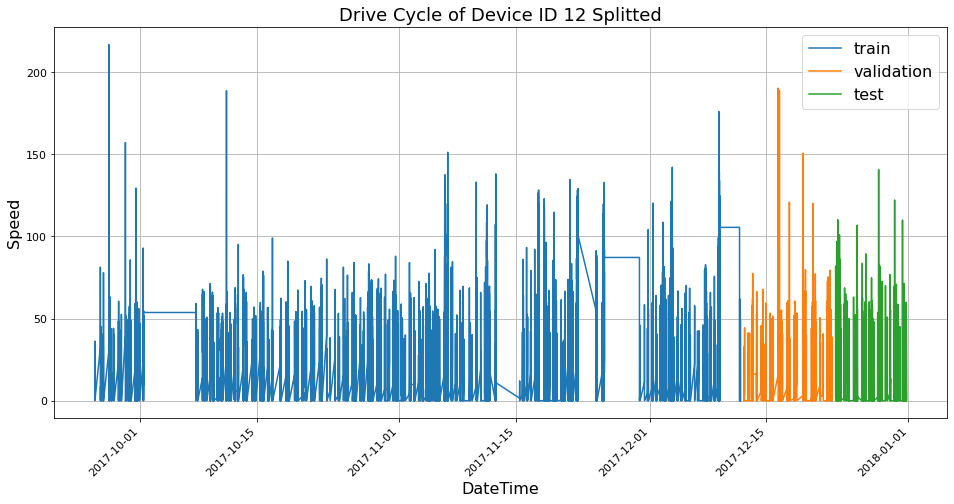

In [163]:
valid_start, test_start = '2017-12-12 00:00:00', '2017-12-23 00:00:00'

plot_split(config.plots_path, data, id, valid_start, test_start, config.feature)

In [130]:
# Min-Max Scaler #
scaler = MinMaxScaler()
data[config.feature] = scaler.fit_transform(data)

# Split the Dataset #
train_X, train_Y, val_X, val_Y, test_X, test_Y, test_shifted = \
    get_time_series_data_(data, valid_start, test_start, config.feature, config.window, print_ratio=True)

0.7697894297113234 0.10565945177374457 0.12455111851493206


Device ID of 34.0

- valid_start, test_start = '2017-09-20 00:06:00', '2017-09-20 00:06:00'

- 0.37778259221144994 0.0 0.6222174077885501

Device ID of 0.0

- valid_start, test_start = '2017-12-27 00:00:00', '2017-12-27 00:00:00'

- 0.7060636528504712 0.0 0.29393634714952876 45

- valid_start, test_start = '2017-12-26 00:00:00', '2017-12-26 00:00:00'

- 0.5835314458612492 0.0 0.41646855413875083 36

- valid_start, test_start = '2017-12-25 00:00:00', '2017-12-25 00:00:00'

- 0.4602569041824452 0.0 0.5397430958175548 27


Device ID of 10.0
- valid_start, test_start = '2017-11-15 00:00:00', '2017-11-15 00:00:00'
- 0.3284533283335417 0.0 0.6715466716664583

- valid_start, test_start = '2017-11-01 00:00:00', '2017-11-01 00:00:00'
- 0.19488250489562936 0.0 0.8051174951043707

- valid_start, test_start = '2017-10-22 00:00:00', '2017-10-22 00:00:00'
- 0.07481459105870589 0.0 0.9251854089412941

In [137]:
transfer_loss = np.load(os.path.join(config.numpy_path, 'lstm_Device_ID_0_train_loss_transfer.npy'))
loss = np.load(os.path.join(config.numpy_path, 'lstm_Device_ID_0_train_loss.npy'))

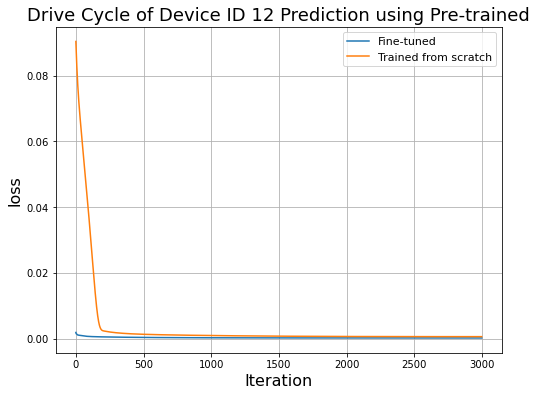

In [143]:
plt.figure(figsize=(8, 6))
plt.plot(transfer_loss, label='Fine-tuned')
plt.plot(loss, label='Trained from scratch')
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid()
plt.legend(fontsize=11)
plt.title('Drive Cycle of Device ID {} Prediction using Pre-trained'.format(id), fontsize=18)
plt.savefig(os.path.join(config.plots_path, 'Drive_Cycle_Device_ID_{}_Loss.png'.format(id)))